MOE_150M_activation Min Train Loss: 2.70443
MOE_150M_activation Min Validation Loss: 2.957
MOE_266M_activation Min Train Loss: 2.559839
MOE_266M_activation Min Validation Loss: 2.8564
180M_dense Min Train Loss: 2.722343
180M_dense Min Validation Loss: 2.9748
MOE_150M_activation Max Hellaswag eval: 0.3396
MOE_266M_activation Max Hellaswag eval: 0.3671
180M_dense Max Hellaswag eval: 0.3252


/var/folders/2z/20dr9wxd40b15f19czgb8fz00000gn/T/ipykernel_54379/105769958.py:65: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0.0, 8.0)


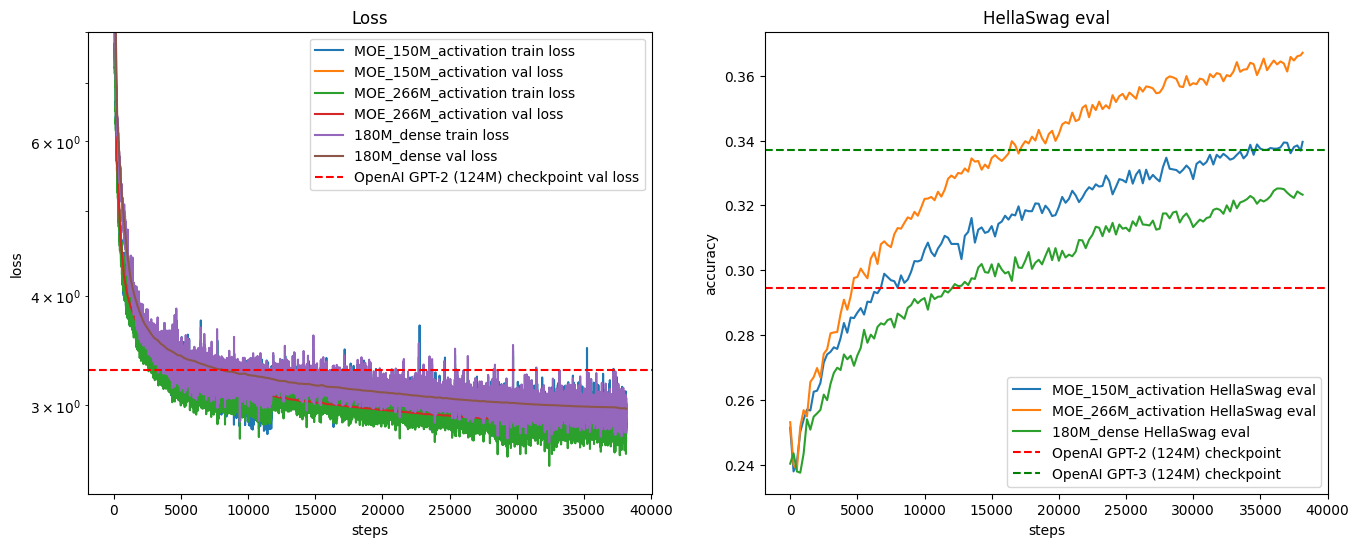

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Baselines
sz = "124M"

loss_baseline = {
    "124M": 3.2924,
}[sz]
hella2_baseline = { # HellaSwag for GPT-2
    "124M": 0.294463,
    "350M": 0.375224,
    "774M": 0.431986,
    "1558M": 0.488946,
}[sz]
hella3_baseline = { # HellaSwag for GPT-3
    "124M": 0.337,
    "350M": 0.436,
    "774M": 0.510,
    "1558M": 0.547,
}[sz]

def load_log(file_path):
    with open(file_path, "r") as f:
        lines = f.readlines()
    streams = {}
    for line in lines:
        step, stream, val = line.strip().split()
        if stream not in streams:
            streams[stream] = {}
        streams[stream][int(step)] = float(val)
    streams_xy = {}
    for k, v in streams.items():
        xy = sorted(list(v.items()))
        streams_xy[k] = list(zip(*xy))
    return streams_xy

# Load multiple logs
logs = {
    "MOE_150M_activation": load_log("log_mix_16_layer(10)_attenH(8)_kvH(8)_acoef(0.02)_b(32)_gradacc(2)_step(38146)dropout(0.0)_jitter(0.0)exp(8)_exppt(2)_lr3e-03/log.txt"),
    "MOE_266M_activation": load_log("log_mix_16_layer(12)_attenH(12)_kvH(4)_acoef(0.02)_b(32)_gradacc(1)_step(38146)dropout(0.0)_jitter(0.0)exp(8)_exppt(2)_lr3e-03/log.txt"),
    "180M_dense": load_log("log_12_12_4_6e-4/log.txt"),
}

# Create figure
plt.figure(figsize=(16, 6))

# Panel 1: losses: both train and val
plt.subplot(121)
for log_name, streams_xy in logs.items():
    xs, ys = streams_xy["train"]
    ys = np.array(ys)
    plt.plot(xs, ys, label=f'{log_name} train loss')
    print(f"{log_name} Min Train Loss:", min(ys))
    xs, ys = streams_xy["val"]
    plt.plot(xs, ys, label=f'{log_name} val loss')
    print(f"{log_name} Min Validation Loss:", min(ys))
# Horizontal line at GPT-2 baseline
if loss_baseline is not None:
    plt.axhline(y=loss_baseline, color='r', linestyle='--', label=f"OpenAI GPT-2 ({sz}) checkpoint val loss")
plt.xlabel("steps")
plt.ylabel("loss")
plt.yscale('log')
plt.ylim(0.0, 8.0)
plt.legend()
plt.title("Loss")

# Panel 2: HellaSwag eval
plt.subplot(122)
for log_name, streams_xy in logs.items():
    xs, ys = streams_xy["hella"]
    ys = np.array(ys)
    plt.plot(xs, ys, label=f"{log_name} HellaSwag eval")
    print(f"{log_name} Max Hellaswag eval:", max(ys))
# Horizontal lines at GPT-2 and GPT-3 baselines
if hella2_baseline:
    plt.axhline(y=hella2_baseline, color='r', linestyle='--', label=f"OpenAI GPT-2 ({sz}) checkpoint")
if hella3_baseline:
    plt.axhline(y=hella3_baseline, color='g', linestyle='--', label=f"OpenAI GPT-3 ({sz}) checkpoint")
plt.xlabel("steps")
plt.ylabel("accuracy")
plt.legend()
plt.title("HellaSwag eval")

plt.show()
